### Fundamental of Machine Learning

In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import regularizers
from keras.datasets import imdb

Using Theano backend.


In [2]:
from myutils import *

In [3]:
# reading the data
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

In [4]:
print(train_data[:2])

[ list([1, 7980, 11, 7980, 46, 15, 186, 8, 30, 2, 11, 6, 7547, 6, 2, 1664, 37, 70, 193, 12, 5, 8315, 12, 46, 19, 3215, 7221, 146, 24, 6, 337, 7, 860, 969, 108, 21, 4529, 56, 2534, 8, 829, 32, 4, 1554, 23, 4, 5277, 22, 288, 920, 924, 1594, 276, 46, 34, 4209, 6094, 2, 108, 45, 6, 87, 1107, 33, 44, 1784, 677, 3596, 38, 33, 5277, 6414, 3113, 20, 12, 66, 2, 180, 8, 35, 8117, 11, 58, 8, 106, 49, 7, 4, 2968, 9838, 10, 10, 2, 9, 2, 39, 6, 7137, 196, 2, 34, 6, 3478, 5154, 5, 240, 24, 654, 40, 4279, 29, 304, 12, 46, 23, 6327, 956, 4, 2351, 6218, 83, 1270, 8, 353, 5, 216, 56, 19, 6, 1347, 8, 607, 4, 1225, 36, 3854, 33, 2, 2, 4, 440, 7, 4, 182, 5, 586, 25, 124, 12, 225, 6, 136, 121, 6, 666, 5010, 9, 617, 198, 446, 4, 2, 2, 1430, 15, 16, 6, 327, 1229, 10, 10, 34, 4, 1696, 5581, 14, 704, 131, 286, 179, 4103, 2296, 31, 7, 4, 298, 1248, 139, 33, 4, 2, 945, 4824, 2, 47, 831, 3327, 2254, 6, 668, 6313, 8, 97, 4099, 13, 482, 50, 1173, 101, 2, 187, 10, 10, 52, 154, 2, 16, 179, 4, 1682, 151, 1286, 187, 23, 

In [5]:
# getting max value of index used in data
max([max(row) for row in train_data])

9999

In [6]:
def vectorization(df, dim):
    """
    df - Input dataframe
    dim - dimension
    """
    tmp = np.zeros((len(df), dim))
    for idx, val in enumerate(df):
        tmp[idx, val] = 1
    return tmp

In [7]:
vec_train_data = vectorization(train_data, 10000)
vec_test_data = vectorization(test_data, 10000)

In [8]:
train_labels = np.asarray(train_label).astype("float32")
test_labels = np.asarray(test_label).astype("float32")

## Controlling Overfitting  
### #1. Creating a model with less layers and parameters

In [9]:
X_val = vec_train_data[:10000]
X_train = vec_train_data[10000:]
y_val = train_labels[:10000]
y_train = train_labels[10000:]

In [10]:
model_16 = models.Sequential()
model_16.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model_16.add(layers.Dense(16, activation="relu"))
model_16.add(layers.Dense(1, activation="sigmoid"))
             
model_16.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
             
hist = model_16.fit(X_train, y_train, 
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

history = hist.history
print(history.keys())

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.5086 - acc: 0.7854 - val_loss: 0.3768 - val_acc: 0.8651
Epoch 2/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.2933 - acc: 0.9069 - val_loss: 0.2973 - val_acc: 0.8875
Epoch 3/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.2170 - acc: 0.9260 - val_loss: 0.2944 - val_acc: 0.8815
Epoch 4/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.1692 - acc: 0.9433 - val_loss: 0.2813 - val_acc: 0.8886
Epoch 5/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.1356 - acc: 0.9573 - val_loss: 0.3009 - val_acc: 0.8838
Epoch 6/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1129 - acc: 0.9639 - val_loss: 0.3033 - val_acc: 0.8853
Epoch 7/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.0938 - acc: 0.9715 - val_loss: 0.3324 - 

In [11]:
history['val_loss']

[0.37676785888671877,
 0.29726380076408387,
 0.29435047998428343,
 0.28128527319431307,
 0.30085223309993742,
 0.30326254262924196,
 0.3323847200393677,
 0.35289463148117067,
 0.37864148440361023,
 0.40662167205810545,
 0.44920877413749694,
 0.46517188258171083,
 0.51509337377548214,
 0.60112496352195743,
 0.59418063831329349,
 0.59179978070259098,
 0.68908907837867739,
 0.66399278545379636,
 0.68713175292015072,
 0.72446904988288885]

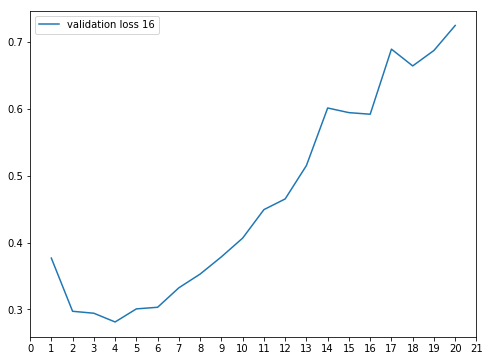

In [12]:
fig = plt.figure(figsize=(8, 6))
plt.plot(range(1,len(history['val_loss'])+1), history['val_loss'], label="validation loss 16")
#plt.plot(range(1,len(history['val_loss'])+1), history['loss'], label="train loss")
plt.xticks(np.arange(22))
plt.legend()

plt.show()

#### Another model with 3 layers and 4 units

In [13]:
model_4 = models.Sequential()
model_4.add(layers.Dense(4, activation="relu", input_shape=(10000,)))
model_4.add(layers.Dense(4, activation="relu"))
model_4.add(layers.Dense(1, activation="sigmoid"))
             
model_4.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
             
hist_4 = model_4.fit(X_train, y_train, 
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.6158 - acc: 0.6185 - val_loss: 0.5600 - val_acc: 0.7140
Epoch 2/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.5214 - acc: 0.7893 - val_loss: 0.5164 - val_acc: 0.7699
Epoch 3/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.4724 - acc: 0.8558 - val_loss: 0.4951 - val_acc: 0.7935
Epoch 4/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.4374 - acc: 0.8913 - val_loss: 0.4684 - val_acc: 0.8684
Epoch 5/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.4107 - acc: 0.9178 - val_loss: 0.4623 - val_acc: 0.8561
Epoch 6/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.3878 - acc: 0.9337 - val_loss: 0.4625 - val_acc: 0.8539
Epoch 7/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.3684 - acc: 0.9458 - val_loss: 0.4526 - 

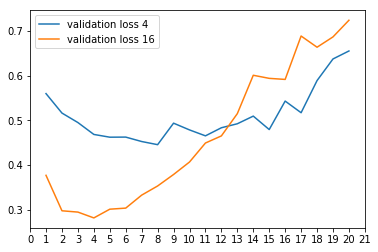

In [14]:
history_4 = hist_4.history

plt.plot(range(1,len(history_4['val_loss'])+1), history_4['val_loss'], label="validation loss 4")
plt.plot(range(1,len(history['val_loss'])+1), history['val_loss'], label="validation loss 16")
#plt.plot(range(1,len(history_4['val_loss'])+1), history_4['loss'], label="train loss")
plt.xticks(np.arange(22))
plt.legend()

plt.show()

#### Another Bigger Model

In [15]:
model_256 = models.Sequential()
model_256.add(layers.Dense(256, activation="relu", input_shape=(10000,)))
model_256.add(layers.Dense(256, activation="relu"))
model_256.add(layers.Dense(1, activation="sigmoid"))
             
model_256.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
             
hist_256 = model_256.fit(X_train, y_train, 
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 297us/step - loss: 0.5323 - acc: 0.7541 - val_loss: 0.3073 - val_acc: 0.8852
Epoch 2/20
15000/15000 [==============================] - 5s 312us/step - loss: 0.2550 - acc: 0.9021 - val_loss: 0.3289 - val_acc: 0.8626
Epoch 3/20
15000/15000 [==============================] - 5s 319us/step - loss: 0.1703 - acc: 0.9355 - val_loss: 0.2812 - val_acc: 0.8875
Epoch 4/20
15000/15000 [==============================] - 5s 317us/step - loss: 0.1066 - acc: 0.9620 - val_loss: 0.3330 - val_acc: 0.8874
Epoch 5/20
15000/15000 [==============================] - 5s 319us/step - loss: 0.0836 - acc: 0.9763 - val_loss: 0.3843 - val_acc: 0.8855
Epoch 6/20
15000/15000 [==============================] - 5s 323us/step - loss: 0.0112 - acc: 0.9981 - val_loss: 0.4953 - val_acc: 0.8861
Epoch 7/20
15000/15000 [==============================] - 5s 317us/step - loss: 0.1172 - acc: 0.9843 - val_loss: 0.4701 - 

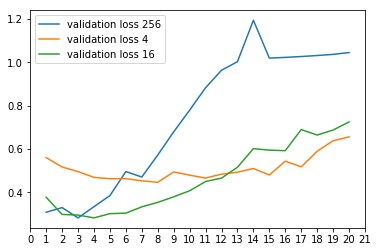

In [16]:
history_256 = hist_256.history

plt.plot(range(1,len(history['val_loss'])+1), history_256['val_loss'], label="validation loss 256")
plt.plot(range(1,len(history['val_loss'])+1), history_4['val_loss'], label="validation loss 4")
plt.plot(range(1,len(history['val_loss'])+1), history['val_loss'], label="validation loss 16")
#plt.plot(range(1,len(history_4['val_loss'])+1), history_4['loss'], label="train loss")
plt.xticks(np.arange(22))
plt.legend()

plt.show()

### #2. Weight Regularization

In [17]:
model_256_l2 = models.Sequential()
model_256_l2.add(layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.001),input_shape=(10000,)))
model_256_l2.add(layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model_256_l2.add(layers.Dense(1, activation="sigmoid"))
             
model_256_l2.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
             
hist_256_l2 = model_256_l2.fit(X_train, y_train, 
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 285us/step - loss: 0.8959 - acc: 0.7431 - val_loss: 0.5707 - val_acc: 0.8818
Epoch 2/20
15000/15000 [==============================] - 5s 319us/step - loss: 0.5113 - acc: 0.8849 - val_loss: 0.4710 - val_acc: 0.8808
Epoch 3/20
15000/15000 [==============================] - 5s 330us/step - loss: 0.4064 - acc: 0.9061 - val_loss: 0.5179 - val_acc: 0.8452
Epoch 4/20
15000/15000 [==============================] - 5s 311us/step - loss: 0.3531 - acc: 0.9134 - val_loss: 0.4680 - val_acc: 0.8687
Epoch 5/20
15000/15000 [==============================] - 5s 308us/step - loss: 0.3261 - acc: 0.9221 - val_loss: 0.4101 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 5s 308us/step - loss: 0.2876 - acc: 0.9372 - val_loss: 0.4180 - val_acc: 0.8843
Epoch 7/20
15000/15000 [==============================] - 5s 310us/step - loss: 0.2822 - acc: 0.9320 - val_loss: 0.4326 - 

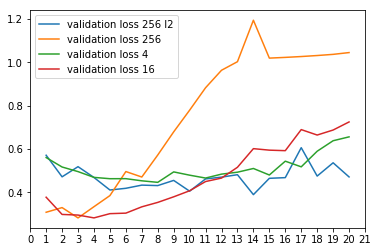

In [18]:
history_256_l2 = hist_256_l2.history

plt.plot(range(1,len(history['val_loss'])+1), history_256_l2['val_loss'], label="validation loss 256 l2")
plt.plot(range(1,len(history['val_loss'])+1), history_256['val_loss'], label="validation loss 256")
plt.plot(range(1,len(history['val_loss'])+1), history_4['val_loss'], label="validation loss 4")
plt.plot(range(1,len(history['val_loss'])+1), history['val_loss'], label="validation loss 16")
#plt.plot(range(1,len(history_4['val_loss'])+1), history_4['loss'], label="train loss")
plt.xticks(np.arange(22))
plt.legend()

plt.show()

###  #3. DropOut

In [23]:
model_256_do = models.Sequential()
model_256_do.add(layers.Dense(256, activation="relu", input_shape=(10000,)))
model_256_do.add(layers.Dropout(0.5))
model_256_do.add(layers.Dense(256, activation="relu"))
model_256_do.add(layers.Dropout(0.5))
model_256_do.add(layers.Dense(1, activation="sigmoid"))
             
model_256_do.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
             
hist_256_do = model_256_do.fit(X_train, y_train, 
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 330us/step - loss: 0.5285 - acc: 0.7351 - val_loss: 0.3146 - val_acc: 0.8753
Epoch 2/20
15000/15000 [==============================] - 5s 337us/step - loss: 0.2936 - acc: 0.8862 - val_loss: 0.2745 - val_acc: 0.8898
Epoch 3/20
15000/15000 [==============================] - 5s 345us/step - loss: 0.2130 - acc: 0.9175 - val_loss: 0.3257 - val_acc: 0.8643
Epoch 4/20
15000/15000 [==============================] - 5s 346us/step - loss: 0.1429 - acc: 0.9475 - val_loss: 0.3036 - val_acc: 0.8922
Epoch 5/20
15000/15000 [==============================] - 5s 346us/step - loss: 0.1185 - acc: 0.9551 - val_loss: 0.3063 - val_acc: 0.8880
Epoch 6/20
15000/15000 [==============================] - 5s 346us/step - loss: 0.0692 - acc: 0.9765 - val_loss: 0.4178 - val_acc: 0.8862
Epoch 7/20
15000/15000 [==============================] - 5s 348us/step - loss: 0.0673 - acc: 0.9778 - val_loss: 0.4245 - 

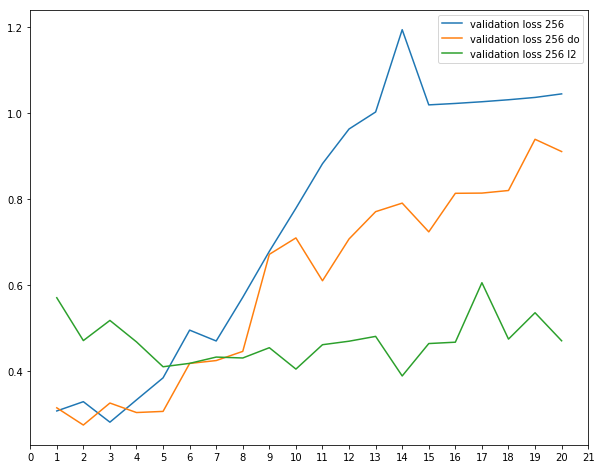

In [32]:
history_256_do = hist_256_do.history

plt.figure(figsize=(10,8))
#plt.plot(range(1,len(history['val_loss'])+1), history_4['val_loss'], '.-',label="validation loss 4")
#plt.plot(range(1,len(history['val_loss'])+1), history['val_loss'], label="validation loss 16")
plt.plot(range(1,len(history['val_loss'])+1), history_256['val_loss'], label="validation loss 256")
plt.plot(range(1,len(history['val_loss'])+1), history_256_do['val_loss'], label="validation loss 256 do")
plt.plot(range(1,len(history['val_loss'])+1), history_256_l2['val_loss'], label="validation loss 256 l2")

#plt.plot(range(1,len(history_4['val_loss'])+1), history_4['loss'], label="train loss")
plt.xticks(np.arange(22))
plt.legend()

plt.show()